In [1]:
print("abc")

abc


In [2]:
import pandas as pd
from autogluon.tabular import TabularPredictor

train = pd.read_csv("train.csv")
train.head()

test = pd.read_csv("test.csv")
test.head()

#convert str to datetime object
#format='%Y%m%d-%H%M%S'
#20210328-200000
#df['DataFrame Column'] = pd.to_datetime(df['DataFrame Column'], format=specify your format)

train['dt_obj'] =pd.to_datetime(train['datetime'], format='%Y-%m-%d %H:%M:%S')
test['dt_obj'] =pd.to_datetime(test['datetime'], format='%Y-%m-%d %H:%M:%S')

# create a new feature
#df['Age Category'] = 'Over 30'
#df.loc[df['Age'] < 30, 'Age Category'] = 'Under 30'
train['year'] = train['dt_obj'].dt.year
train['month'] = train['dt_obj'].dt.month
train['day'] = train['dt_obj'].dt.day
train['hour'] = train['dt_obj'].dt.hour
train['min'] = train['dt_obj'].dt.minute
train['second'] = train['dt_obj'].dt.second
train['dayofweek'] = train["dt_obj"].dt.dayofweek

test['year'] = test['dt_obj'].dt.year
test['month'] = test['dt_obj'].dt.month
test['day'] = test['dt_obj'].dt.day
test['hour'] = test['dt_obj'].dt.hour
test['min'] = test['dt_obj'].dt.minute
test['second'] = test['dt_obj'].dt.second
test['dayofweek'] = test["dt_obj"].dt.dayofweek

train['season']=0

#winter
train.loc[train['month'] == 1 , 'season'] = 1
train.loc[train['month'] == 2 , 'season'] = 1
train.loc[train['month'] == 12 , 'season'] = 1
#spring
train.loc[train['month'] == 3 , 'season'] = 2
train.loc[train['month'] == 4 , 'season'] = 2
train.loc[train['month'] == 5 , 'season'] = 2
#summer
train.loc[train['month'] == 6 , 'season'] = 3
train.loc[train['month'] == 7 , 'season'] = 3
train.loc[train['month'] == 8 , 'season'] = 3

#winter
train.loc[train['month'] == 9, 'season'] = 4
train.loc[train['month'] == 10 , 'season'] = 4
train.loc[train['month'] == 11 , 'season'] = 4

test['season']=0
#winter
test.loc[test['month'] == 1 , 'season'] = 1
test.loc[test['month'] == 2 , 'season'] = 1
test.loc[test['month'] == 12 , 'season'] = 1
#spring
test.loc[test['month'] == 3 , 'season'] = 2
test.loc[test['month'] == 4 , 'season'] = 2
test.loc[test['month'] == 5 , 'season'] = 2
#summer
test.loc[test['month'] == 6 , 'season'] = 3
test.loc[test['month'] == 7 , 'season'] = 3
test.loc[test['month'] == 8 , 'season'] = 3

#winter
test.loc[test['month'] == 9, 'season'] = 4
test.loc[test['month'] == 10 , 'season'] = 4
test.loc[test['month'] == 11 , 'season'] = 4

#morning, lunch, and evening rush hour, 7-9am, 11am-1pm, and 5-6pm
#hr_label
train['hr_label']=0
#7-9
train.loc[train['hour'] == 7 , 'hr_label'] = 1
train.loc[train['hour'] == 8 , 'hr_label'] = 1
train.loc[train['hour'] == 9 , 'hr_label'] = 1
#11-13
train.loc[train['hour'] == 11 , 'hr_label'] = 2
train.loc[train['hour'] == 12, 'hr_label'] = 2
train.loc[train['hour'] == 13 , 'hr_label'] = 2
#17-18
train.loc[train['hour'] == 17 , 'hr_label'] = 3
train.loc[train['hour'] == 18 , 'hr_label'] = 3



#morning, lunch, and evening rush hour, 7-9am, 11am-1pm, and 5-6pm
#hr_label
test['hr_label']=0
#7-9
test.loc[test['hour'] == 7 , 'hr_label'] = 1
test.loc[test['hour'] == 8 , 'hr_label'] = 1
test.loc[test['hour'] == 9 , 'hr_label'] = 1
#11-13
test.loc[test['hour'] == 11 , 'hr_label'] = 2
test.loc[test['hour'] == 12, 'hr_label'] = 2
test.loc[test['hour'] == 13 , 'hr_label'] = 2
#17-18
test.loc[test['hour'] == 17 , 'hr_label'] = 3
test.loc[test['hour'] == 18 , 'hr_label'] = 3

test['temp_label']=0
#cold
test.loc[test['temp'] <15  , 'temp_label'] = 1
#mild
test.loc[((test['temp'] >= 15) &( test['temp'] <= 26)), 'temp_label'] = 2
#hot
test.loc[test['temp'] > 26 , 'temp_label'] = 3

train['temp_label']=0
#cold
train.loc[train['temp'] <15  , 'temp_label'] = 1
#mild
train.loc[((train['temp'] >= 15) &( train['temp'] <= 26)), 'temp_label'] = 2
#hot
train.loc[train['temp'] > 26 , 'temp_label'] = 3


train['hum_label']=0
#not-hum
train.loc[train['humidity'] <55  , 'hum_label'] = 1
#hum
train.loc[(train['humidity'] >= 55), 'hum_label'] = 2


test['hum_label']=0
#not-hum
test.loc[test['humidity'] <55  , 'hum_label'] = 1
#hum
test.loc[(test['humidity'] >= 55), 'hum_label'] = 2

test['windspeed']=0
#not-windy
test.loc[test['windspeed'] <20  , 'wind_label'] = 1
#windy
test.loc[(test['windspeed'] >= 20), 'wind_label'] = 2

train['windspeed']=0
#not-windy
train.loc[train['windspeed'] <20  , 'wind_label'] = 1
#windy
train.loc[(train['windspeed'] >= 20), 'wind_label'] = 2

test[test['wind_label'] <= 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,dt_obj,...,month,day,hour,min,second,dayofweek,hr_label,temp_label,hum_label,wind_label


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  object        
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  int64         
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  dt_obj      10886 non-null  datetime64[ns]
 13  year        10886 non-null  int64         
 14  month       10886 non-null  int64         
 15  day         10886 non-null  int64         
 16  hour        10886 non-

In [4]:
# Change the date column to a datetime
#df.loc[:, "date"] = pd.to_datetime(df.loc[:, "date"])
# Change weather column to a category 
train.loc[:, "hr_label"] = train["hr_label"].astype("category")
train.loc[:, "temp_label"] = train["temp_label"].astype("category")
train.loc[:, "hum_label"] = train["hum_label"].astype("category")
train.loc[:, "wind_label"] = train["wind_label"].astype("category")

In [5]:
test.loc[:, "hr_label"] = test["hr_label"].astype("category")
test.loc[:, "temp_label"] = test["temp_label"].astype("category")
test.loc[:, "hum_label"] = test["hum_label"].astype("category")
test.loc[:, "wind_label"] = test["wind_label"].astype("category")

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  object        
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  int64         
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  dt_obj      10886 non-null  datetime64[ns]
 13  year        10886 non-null  int64         
 14  month       10886 non-null  int64         
 15  day         10886 non-null  int64         
 16  hour        10886 non-

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   object        
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   int64         
 9   dt_obj      6493 non-null   datetime64[ns]
 10  year        6493 non-null   int64         
 11  month       6493 non-null   int64         
 12  day         6493 non-null   int64         
 13  hour        6493 non-null   int64         
 14  min         6493 non-null   int64         
 15  second      6493 non-null   int64         
 16  dayofweek   6493 non-nul

In [8]:
train_c=train
train_c = train_c.drop('registered',axis=1)
train_c = train_c.drop('count',axis=1)

train_r=train
train_r = train_r.drop('casual',axis=1)
train_r = train_r.drop('count',axis=1)


In [9]:
train_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  object        
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  int64         
 9   casual      10886 non-null  int64         
 10  dt_obj      10886 non-null  datetime64[ns]
 11  year        10886 non-null  int64         
 12  month       10886 non-null  int64         
 13  day         10886 non-null  int64         
 14  hour        10886 non-null  int64         
 15  min         10886 non-null  int64         
 16  second      10886 non-

In [10]:
train_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  object        
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  int64         
 9   registered  10886 non-null  int64         
 10  dt_obj      10886 non-null  datetime64[ns]
 11  year        10886 non-null  int64         
 12  month       10886 non-null  int64         
 13  day         10886 non-null  int64         
 14  hour        10886 non-null  int64         
 15  min         10886 non-null  int64         
 16  second      10886 non-

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   object        
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   int64         
 9   dt_obj      6493 non-null   datetime64[ns]
 10  year        6493 non-null   int64         
 11  month       6493 non-null   int64         
 12  day         6493 non-null   int64         
 13  hour        6493 non-null   int64         
 14  min         6493 non-null   int64         
 15  second      6493 non-null   int64         
 16  dayofweek   6493 non-nul

In [12]:
train_r = train_r.drop('datetime',axis=1)
#train_r = train_r.drop('dt_obj',axis=1)
train_c = train_c.drop('datetime',axis=1)
#train_c = train_c.drop('dt_obj',axis=1)

test = test.drop('datetime',axis=1)
#test = test.drop('dt_obj',axis=1)



In [13]:
train_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   season      10886 non-null  int64         
 1   holiday     10886 non-null  int64         
 2   workingday  10886 non-null  int64         
 3   weather     10886 non-null  int64         
 4   temp        10886 non-null  float64       
 5   atemp       10886 non-null  float64       
 6   humidity    10886 non-null  int64         
 7   windspeed   10886 non-null  int64         
 8   casual      10886 non-null  int64         
 9   dt_obj      10886 non-null  datetime64[ns]
 10  year        10886 non-null  int64         
 11  month       10886 non-null  int64         
 12  day         10886 non-null  int64         
 13  hour        10886 non-null  int64         
 14  min         10886 non-null  int64         
 15  second      10886 non-null  int64         
 16  dayofweek   10886 non-

In [14]:
train_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   season      10886 non-null  int64         
 1   holiday     10886 non-null  int64         
 2   workingday  10886 non-null  int64         
 3   weather     10886 non-null  int64         
 4   temp        10886 non-null  float64       
 5   atemp       10886 non-null  float64       
 6   humidity    10886 non-null  int64         
 7   windspeed   10886 non-null  int64         
 8   registered  10886 non-null  int64         
 9   dt_obj      10886 non-null  datetime64[ns]
 10  year        10886 non-null  int64         
 11  month       10886 non-null  int64         
 12  day         10886 non-null  int64         
 13  hour        10886 non-null  int64         
 14  min         10886 non-null  int64         
 15  second      10886 non-null  int64         
 16  dayofweek   10886 non-

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   season      6493 non-null   int64         
 1   holiday     6493 non-null   int64         
 2   workingday  6493 non-null   int64         
 3   weather     6493 non-null   int64         
 4   temp        6493 non-null   float64       
 5   atemp       6493 non-null   float64       
 6   humidity    6493 non-null   int64         
 7   windspeed   6493 non-null   int64         
 8   dt_obj      6493 non-null   datetime64[ns]
 9   year        6493 non-null   int64         
 10  month       6493 non-null   int64         
 11  day         6493 non-null   int64         
 12  hour        6493 non-null   int64         
 13  min         6493 non-null   int64         
 14  second      6493 non-null   int64         
 15  dayofweek   6493 non-null   int64         
 16  hr_label    6493 non-nul

In [16]:
# predictor_c = TabularPredictor(label="casual").fit(
#     train_data=train_c, time_limit=120, presets="best_quality"
# )

In [17]:
#y_pred_c = predictor_c.predict(test)

In [18]:
# predictor_c.fit_summary()

# ### Review AutoGluon's training run with ranking of models that did the best.

# predictor_c.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

# ### Create predictions from test dataset

# print("AutoGluon infers problem type is: ", predictor_c.problem_type)
# print("AutoGluon identified the following types of features:")
# print(predictor_c.feature_metadata)

In [19]:
# import autogluon.core as ag
# from sklearn.model_selection import train_test_split

# nn_options = {  # specifies non-default hyperparameter values for neural network models
#     'num_epochs': 20,  # number of training epochs (controls training time of NN models)
#     'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
#     'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
#     'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
# }

# gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
#     'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
#     'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
#     #'num_leaves': ag.space.Int(lower=52, upper=132, default=72),  # number of leaves in trees (integer hyperparameter)

# }

# hyperparameters = {  # hyperparameters of each model type
#                    'GBM': gbm_options,
#                    'NN_TORCH': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
#                   }  # When these keys are missing from hyperparameters dict, no models of that type are trained

# time_limit = 4*60  # train various models for ~2 min
# num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
# search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

# hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
#     'num_trials': num_trials,
#     'scheduler' : 'local',
#     'searcher': search_strategy,
# }



# predictor_r = TabularPredictor(label="registered",problem_type="regression").fit(
#     train_r_80, tuning_data=train_r_20, time_limit=time_limit,
#     hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
# )



In [20]:
# train_c_80, train_c_20 = train_test_split(train_c, test_size=0.2, random_state=0)


# predictor_c_p = TabularPredictor(label="casual").fit(
#     train_c_80, tuning_data=train_c_20, time_limit=time_limit,
#     hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
# )

In [21]:
# predictor_c_p.fit_summary()

# ### Review AutoGluon's training run with ranking of models that did the best.

# predictor_c_p.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

### Create predictions from test dataset

# print("AutoGluon infers problem type is: ", predictor_c.problem_type)
# print("AutoGluon identified the following types of features:")
# print(predictor_c.feature_metadata)

In [22]:
# predictor_c_p.fit_summary()

# ### Review AutoGluon's training run with ranking of models that did the best.

# predictor_c_p.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

### Create predictions from test dataset

# print("AutoGluon infers problem type is: ", predictor_c.problem_type)
# print("AutoGluon identified the following types of features:")
# print(predictor_c.feature_metadata)

In [23]:
# predictor_r.fit_summary()

# ### Review AutoGluon's training run with ranking of models that did the best.

# predictor_r.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

# ### Create predictions from test dataset

# print("AutoGluon infers problem type is: ", predictor_c.problem_type)
# print("AutoGluon identified the following types of features:")
# print(predictor_r.feature_metadata)

In [24]:
# # # predict from specific model/stack
# # #i = 0  # index of model to use

# for i in range(0, 15):
#     model_to_use = predictor_c_p.get_model_names()[i]
# #y_pred_r = predictor_r.predict(test, model=model_to_use)
#     print(i);print(model_to_use);
#     #LightGBM\T2

In [25]:
# #test2 = pd.read_csv("test.csv")
# #test['dt_obj'] =pd.to_datetime(test2['datetime'], format='%Y-%m-%d %H:%M:%S')

# # # predict from specific model/stack
# i = 1  # index of model to use

# #for i in range(0, 15):
# model_to_use = predictor_c_p.get_model_names()[i]
# y_pred_c = predictor_c_p.predict(test, model=model_to_use)
# print(i);print(model_to_use);
# #LightGBM\T2


In [26]:
# i = 10  # index of model to use

# for i in range(0, 11):
#     model_to_use = predictor_r.get_model_names()[i]
#     print(i);print(model_to_use);
# #y_pred_r = predictor_r.predict(test, model=model_to_use)


In [27]:
# train_c_80, train_c_20 = train_test_split(train_c, test_size=0.2, random_state=0)

# predictor_c = TabularPredictor(label="casual",problem_type="regression").fit(
#     train_c_80, tuning_data=train_c_20, time_limit=time_limit,
#     hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
# )


In [28]:
# predictor_c.fit_summary()

# ### Review AutoGluon's training run with ranking of models that did the best.

# predictor_c.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

# ### Create predictions from test dataset

# print("AutoGluon infers problem type is: ", predictor_c.problem_type)
# print("AutoGluon identified the following types of features:")
# print(predictor_c.feature_metadata)

In [29]:

predictor_r = TabularPredictor(label="registered").fit(
    train_data=train_r, time_limit=180, presets="best_quality"
)



No path specified. Models will be saved in: "AutogluonModels/ag-20220830_120542\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 180s
AutoGluon will save models to "AutogluonModels/ag-20220830_120542\"
AutoGluon Version:  0.5.2
Python Version:     3.9.12
Operating System:   Windows
Train Data Rows:    10886
Train Data Columns: 20
Label Column: registered
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (886, 0, 155.55218, 151.03903)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGen

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2  -26.690395      20.837860   82.845876                0.000999           0.392949            2       True          7
1      WeightedEnsemble_L3  -26.751984      22.827408  114.852428                0.001000           0.203458            3       True         12
2          LightGBM_BAG_L2  -26.997166      21.753110   89.510039                0.171958           6.639861            2       True          9
3   RandomForestMSE_BAG_L2  -27.160117      22.158264   93.762886                0.577112          10.892708            2       True         10
4          LightGBM_BAG_L1  -27.368571       5.554903   19.174975                5.554903          19.174975            1       True          4
5        LightGBMXT_BAG_L2  -28.055534      22.027961   90.276884         

<AxesSubplot:xlabel='model'>

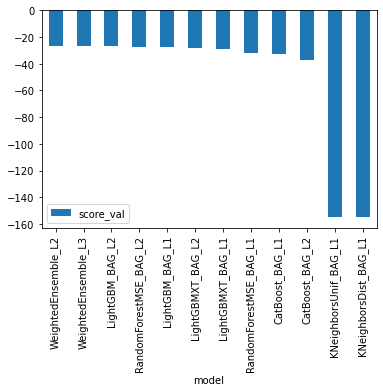

In [30]:
predictor_r.fit_summary()

### Review AutoGluon's training run with ranking of models that did the best.

predictor_r.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

### Create predictions from test dataset

# print("AutoGluon infers problem type is: ", predictor_c.problem_type)
# print("AutoGluon identified the following types of features:")
# print(predictor_r.feature_metadata)

In [31]:
predictor_c = TabularPredictor(label="casual").fit(
    train_data=train_c, time_limit=180, presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20220830_120855\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 180s
AutoGluon will save models to "AutogluonModels/ag-20220830_120855\"
AutoGluon Version:  0.5.2
Python Version:     3.9.12
Operating System:   Windows
Train Data Rows:    10886
Train Data Columns: 20
Label Column: casual
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	First 10 (of 309) unique label values:  [3, 8, 5, 0, 2, 1, 12, 26, 29, 47]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Fraction of data from classes with at least 5 examples that will be kept for trai

Detailed Traceback:
Traceback (most recent call last):
  File "C:\Users\Theraphi_WellnessSed\anaconda3\lib\site-packages\autogluon\core\trainer\abstract_trainer.py", line 1126, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_val, **model_fit_kwargs)
  File "C:\Users\Theraphi_WellnessSed\anaconda3\lib\site-packages\autogluon\core\trainer\abstract_trainer.py", line 1083, in _train_single
    model = model.fit(X=X, y=y, X_val=X_val, y_val=y_val, **model_fit_kwargs)
  File "C:\Users\Theraphi_WellnessSed\anaconda3\lib\site-packages\autogluon\core\models\abstract\abstract_model.py", line 587, in fit
    out = self._fit(**kwargs)
  File "C:\Users\Theraphi_WellnessSed\anaconda3\lib\site-packages\autogluon\core\models\ensemble\stacker_ensemble_model.py", line 154, in _fit
    return super()._fit(X=X, y=y, time_limit=time_limit, **kwargs)
  File "C:\Users\Theraphi_WellnessSed\anaconda3\lib\site-packages\autogluon\core\models\ensemble\bagged_ensemble_model.py", line 232, i

In [32]:
# #test2 = pd.read_csv("test.csv")
# #test['dt_obj'] =pd.to_datetime(test2['datetime'], format='%Y-%m-%d %H:%M:%S')

# # # predict from specific model/stack
# #i = 1  # index of model to use

# for i in range(0, 15):
#     model_to_use = predictor_r.get_model_names()[i]
# #y_pred_c = predictor_c_p.predict(test, model=model_to_use)
#     print(i);print(model_to_use);
# #LightGBM\T2

In [33]:
# #test2 = pd.read_csv("test.csv")
# #test['dt_obj'] =pd.to_datetime(test2['datetime'], format='%Y-%m-%d %H:%M:%S')

# # # predict from specific model/stack
# i = 6  # index of model to use

# #for i in range(0, 15):
# model_to_use = predictor_r.get_model_names()[i]
# print(i);print(model_to_use);

# y_pred_r = predictor_r.predict(test, model=model_to_use)
# #LightGBM\T2

*** Summary of fit() ***
Estimated performance of each model:
                   model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      LightGBMXT_BAG_L1   0.124706      54.565226   89.766939               54.565226          89.766939            1       True          3
1    WeightedEnsemble_L2   0.124706      54.573204  119.111883                0.007978          29.344944            2       True          4
2  KNeighborsUnif_BAG_L1   0.062776       0.363650    0.075825                0.363650           0.075825            1       True          1
3  KNeighborsDist_BAG_L1   0.062776       0.371903    0.077677                0.371903           0.077677            1       True          2
Number of models trained: 4
Types of models trained:
{'WeightedEnsembleModel', 'StackerEnsembleModel_LGB', 'StackerEnsembleModel_KNN'}
Bagging used: True  (with 8 folds)
Multi-layer stack-ensembling used: False 
Feature Metadata (Pro

<AxesSubplot:xlabel='model'>

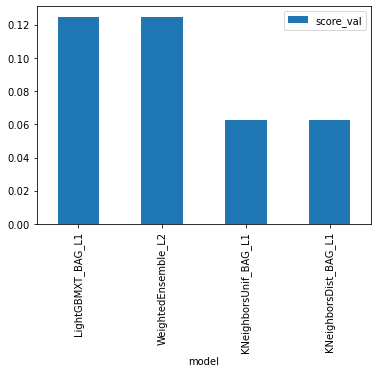

In [34]:
predictor_c.fit_summary()

### Review AutoGluon's training run with ranking of models that did the best.

predictor_c.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

### Create predictions from test dataset

# print("AutoGluon infers problem type is: ", predictor_c.problem_type)
# print("AutoGluon identified the following types of features:")
# print(predictor_c.feature_metadata)

In [36]:
y_pred_r = predictor_r.predict(test)


y_pred_c = predictor_c.predict(test)

In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   season      6493 non-null   int64         
 1   holiday     6493 non-null   int64         
 2   workingday  6493 non-null   int64         
 3   weather     6493 non-null   int64         
 4   temp        6493 non-null   float64       
 5   atemp       6493 non-null   float64       
 6   humidity    6493 non-null   int64         
 7   windspeed   6493 non-null   int64         
 8   dt_obj      6493 non-null   datetime64[ns]
 9   year        6493 non-null   int64         
 10  month       6493 non-null   int64         
 11  day         6493 non-null   int64         
 12  hour        6493 non-null   int64         
 13  min         6493 non-null   int64         
 14  second      6493 non-null   int64         
 15  dayofweek   6493 non-null   int64         
 16  hr_label    6493 non-nul

In [38]:
result = pd.concat([y_pred_r, y_pred_c], axis=1, join='inner')

result['count']=(round(result['registered'])+result['casual']).astype('int')

result=result.drop("registered",axis=1)

result=result.drop("casual",axis=1)

test3 = pd.read_csv("test.csv")

result['datetime']=test3['datetime']

result[result['count'] < 0]

,count,datetime
52,-1,2011-01-22 04:00:00
53,-4,2011-01-22 06:00:00
54,-6,2011-01-22 07:00:00
75,-2,2011-01-23 05:00:00
76,-4,2011-01-23 06:00:00
77,-3,2011-01-23 07:00:00
96,-2,2011-01-24 03:00:00
97,-2,2011-01-24 04:00:00
118,-2,2011-01-25 01:00:00
119,-2,2011-01-25 02:00:00


In [39]:






result.loc[result['count'] < 0 , 'count'] = 0

submission=result

submission.to_csv("submission.csv", index=False)

import json
kaggle_username = "kanericaws"
kaggle_key = "9c72a930e84f7c1845fbc803dc7adfdc"

!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "baseline after feature enginnering"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/156k [00:00<?, ?B/s]
  5%|5         | 8.00k/156k [00:00<00:03, 49.0kB/s]
100%|##########| 156k/156k [00:01<00:00, 109kB/s]  
